# Is Fandango Still Inflating Ratings?

In October 2015, Walt Hickey from FiveThirtyEight published a popular article where he presented strong evidence which suggest that Fandango's movie rating system was biased and dishonest. In this project, we'll analyze more recent movie ratings data to determine whether there has been any change in Fandango's rating system after Hickey's analysis.

# Understanding the Data

We'll work with two samples of movie ratings:the data in one sample was collected previous to Hickey's analysis, while the other sample was collected after. Let's start by reading in the two samples (which are stored as CSV files) and getting familiar with their structure.

In [1]:
import pandas as pd

previous = pd.read_csv('fandango_score_comparison.csv')
after = pd.read_csv('movie_ratings_16_17.csv')

previous.head()

FILM  RottenTomatoes  RottenTomatoes_User  \
0  Avengers: Age of Ultron (2015)              74                   86   
1               Cinderella (2015)              85                   80   
2                  Ant-Man (2015)              80                   90   
3          Do You Believe? (2015)              18                   84   
4   Hot Tub Time Machine 2 (2015)              14                   28   

   Metacritic  Metacritic_User  IMDB  Fandango_Stars  Fandango_Ratingvalue  \
0          66              7.1   7.8             5.0                   4.5   
1          67              7.5   7.1             5.0                   4.5   
2          64              8.1   7.8             5.0                   4.5   
3          22              4.7   5.4             5.0                   4.5   
4          29              3.4   5.1             3.5                   3.0   

   RT_norm  RT_user_norm         ...           IMDB_norm  RT_norm_round  \
0     3.70           4.3         ...                3.90            3.5   
1     4.25           4.0         ...                3.55            4.5   
2     4.00           4.5         ...                3.90            4.0   
3     0.90           4.2         ...                2.70            1.0   
4     0.70           1.4         ...                2.55            0.5   

   RT_user_norm_round  Metacritic_norm_round  Metacritic_user_norm_round  \
0                 4.5                    3.5                         3.5   
1                 4.0                    3.5                         4.0   
2                 4.5                    3.0                         4.0   
3                 4.0                    1.0                         2.5   
4                 1.5                    1.5                         1.5   

   IMDB_norm_round  Metacritic_user_vote_count  IMDB_user_vote_count  \
0              4.0                        1330                271107   
1              3.5                         249                 65709   
2              4.0                         627                103660   
3              2.5                          31                  3136   
4              2.5                          88                 19560   

   Fandango_votes  Fandango_Difference  
0           14846                  0.5  
1           12640                  0.5  
2           12055                  0.5  
3            1793                  0.5  
4            1021                  0.5  

[5 rows x 22 columns]

In [2]:
after.head()

movie  year  metascore  imdb  tmeter  audience  fandango  \
0      10 Cloverfield Lane  2016         76   7.2      90        79       3.5   
1                 13 Hours  2016         48   7.3      50        83       4.5   
2      A Cure for Wellness  2016         47   6.6      40        47       3.0   
3          A Dog's Purpose  2017         43   5.2      33        76       4.5   
4  A Hologram for the King  2016         58   6.1      70        57       3.0   

   n_metascore  n_imdb  n_tmeter  n_audience  nr_metascore  nr_imdb  \
0         3.80    3.60      4.50        3.95           4.0      3.5   
1         2.40    3.65      2.50        4.15           2.5      3.5   
2         2.35    3.30      2.00        2.35           2.5      3.5   
3         2.15    2.60      1.65        3.80           2.0      2.5   
4         2.90    3.05      3.50        2.85           3.0      3.0   

   nr_tmeter  nr_audience  
0        4.5          4.0  
1        2.5          4.0  
2        2.0          2.5  
3        1.5          4.0  
4        3.5          3.0

In [3]:
fandango_previous = previous[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes',
                             'Fandango_Difference']].copy()
fandango_after = after[['movie', 'year', 'fandango']].copy()

fandango_previous.head()

FILM  Fandango_Stars  Fandango_Ratingvalue  \
0  Avengers: Age of Ultron (2015)             5.0                   4.5   
1               Cinderella (2015)             5.0                   4.5   
2                  Ant-Man (2015)             5.0                   4.5   
3          Do You Believe? (2015)             5.0                   4.5   
4   Hot Tub Time Machine 2 (2015)             3.5                   3.0   

   Fandango_votes  Fandango_Difference  
0           14846                  0.5  
1           12640                  0.5  
2           12055                  0.5  
3            1793                  0.5  
4            1021                  0.5

In [4]:
fandango_after.head()

movie  year  fandango
0      10 Cloverfield Lane  2016       3.5
1                 13 Hours  2016       4.5
2      A Cure for Wellness  2016       3.0
3          A Dog's Purpose  2017       4.5
4  A Hologram for the King  2016       3.0

In [5]:
fandango_previous = previous[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes',
                             'Fandango_Difference']].copy()
fandango_after = after[['movie', 'year', 'fandango']].copy()

fandango_previous.head()

FILM  Fandango_Stars  Fandango_Ratingvalue  \
0  Avengers: Age of Ultron (2015)             5.0                   4.5   
1               Cinderella (2015)             5.0                   4.5   
2                  Ant-Man (2015)             5.0                   4.5   
3          Do You Believe? (2015)             5.0                   4.5   
4   Hot Tub Time Machine 2 (2015)             3.5                   3.0   

   Fandango_votes  Fandango_Difference  
0           14846                  0.5  
1           12640                  0.5  
2           12055                  0.5  
3            1793                  0.5  
4            1021                  0.5

In [6]:
fandango_after.head()

movie  year  fandango
0      10 Cloverfield Lane  2016       3.5
1                 13 Hours  2016       4.5
2      A Cure for Wellness  2016       3.0
3          A Dog's Purpose  2017       4.5
4  A Hologram for the King  2016       3.0

In [7]:
fandango_after.sample(10, random_state = 1)

movie  year  fandango
108                   Mechanic: Resurrection  2016       4.0
206                                 Warcraft  2016       4.0
106                                Max Steel  2016       3.5
107                            Me Before You  2016       4.5
51   Fantastic Beasts and Where to Find Them  2016       4.5
33                                      Cell  2016       3.0
59                                    Genius  2016       3.5
152                                    Sully  2016       4.5
4                    A Hologram for the King  2016       3.0
31                Captain America: Civil War  2016       4.5

In [8]:
sum(fandango_previous['Fandango_votes'] < 30)

0

In [9]:
fandango_previous.head()

FILM  Fandango_Stars  Fandango_Ratingvalue  \
0  Avengers: Age of Ultron (2015)             5.0                   4.5   
1               Cinderella (2015)             5.0                   4.5   
2                  Ant-Man (2015)             5.0                   4.5   
3          Do You Believe? (2015)             5.0                   4.5   
4   Hot Tub Time Machine 2 (2015)             3.5                   3.0   

   Fandango_votes  Fandango_Difference  
0           14846                  0.5  
1           12640                  0.5  
2           12055                  0.5  
3            1793                  0.5  
4            1021                  0.5

In [10]:
fandango_previous['Year'] = fandango_previous['FILM'].str[-5:-1]
fandango_previous.head(2)

FILM  Fandango_Stars  Fandango_Ratingvalue  \
0  Avengers: Age of Ultron (2015)             5.0                   4.5   
1               Cinderella (2015)             5.0                   4.5   

   Fandango_votes  Fandango_Difference  Year  
0           14846                  0.5  2015  
1           12640                  0.5  2015

In [11]:
fandango_previous['Year'].value_counts()

2015    129
2014     17
Name: Year, dtype: int64

In [12]:
fandango_2015 = fandango_previous[fandango_previous['Year'] == '2015'].copy()
fandango_2015['Year'].value_counts()

2015    129
Name: Year, dtype: int64

In [13]:
fandango_after['year'].value_counts()

2016    191
2017     23
Name: year, dtype: int64

In [14]:
fandango_2016 = fandango_after[fandango_after['year'] == 2016].copy()
fandango_2016['year'].value_counts()

2016    191
Name: year, dtype: int64

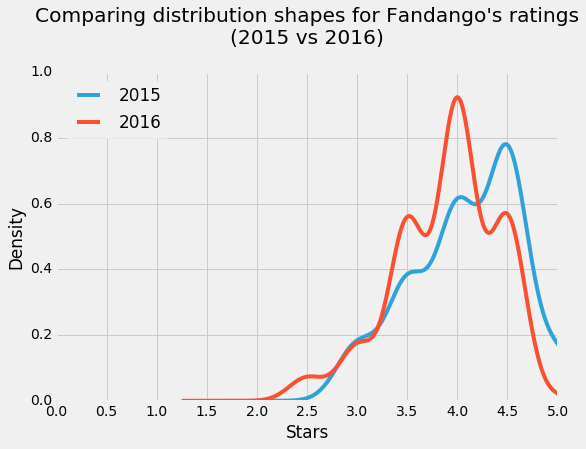

In [15]:
import matplotlib.pyplot as plt
from numpy import arange
%matplotlib inline
plt.style.use('fivethirtyeight')

fandango_2015['Fandango_Stars'].plot.kde(label = '2015', legend = True, figsize = (8,5.5))
fandango_2016['fandango'].plot.kde(label = '2016', legend = True)

plt.title("Comparing distribution shapes for Fandango's ratings\n(2015 vs 2016)",
          y = 1.07) # the `y` parameter pads the title upward
plt.xlabel('Stars')
plt.xlim(0,5) # because ratings start at 0 and end at 5
plt.xticks(arange(0,5.1,.5))
plt.show()

In [16]:
print('2015' + '\n' + '-' * 16) # To help us distinguish between the two tables immediately and
                                # avoid silly mistakes as we read to and fro
fandango_2015['Fandango_Stars'].value_counts(normalize = True).sort_index() * 100

2015
----------------


3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [17]:
print('2016' + '\n' + '-' * 16)
fandango_2016['fandango'].value_counts(normalize = True).sort_index() * 100

2016
----------------


2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

In [18]:
mean_2015 = fandango_2015['Fandango_Stars'].mean()
mean_2016 = fandango_2016['fandango'].mean()

median_2015 = fandango_2015['Fandango_Stars'].median()
median_2016 = fandango_2016['fandango'].median()

mode_2015 = fandango_2015['Fandango_Stars'].mode()[0] # the output of Series.mode() is a bit uncommon
mode_2016 = fandango_2016['fandango'].mode()[0]

summary = pd.DataFrame()
summary['2015'] = [mean_2015, median_2015, mode_2015]
summary['2016'] = [mean_2016, median_2016, mode_2016]
summary.index = ['mean', 'median', 'mode']
summary

2015      2016
mean    4.085271  3.887435
median  4.000000  4.000000
mode    4.500000  4.000000

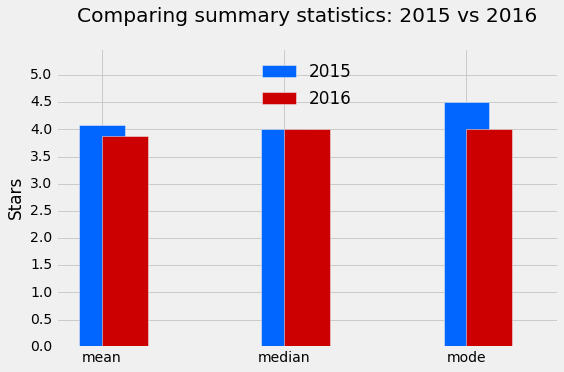

In [19]:
plt.style.use('fivethirtyeight')
summary['2015'].plot.bar(color = '#0066FF', align = 'center', label = '2015', width = .25)
summary['2016'].plot.bar(color = '#CC0000', align = 'edge', label = '2016', width = .25,
                         rot = 0, figsize = (8,5))

plt.title('Comparing summary statistics: 2015 vs 2016', y = 1.07)
plt.ylim(0,5.5)
plt.yticks(arange(0,5.1,.5))
plt.ylabel('Stars')
plt.legend(framealpha = 0, loc = 'upper center')
plt.show()

In [20]:
(summary.loc['mean'][0] - summary.loc['mean'][1]) / summary.loc['mean'][0]

0.04842683568951993